In [67]:
from lightgbm import LGBMRegressor # NUEVO

from xgboost import XGBRegressor

from catboost import CatBoostRegressor # NUEVO

from sklearn.svm import SVR # NUEVO

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures
from skopt import BayesSearchCV

import numpy as np # libreria estadistica 
import pandas as pd # libreria de manipulacion de dataframes
from sklearn.tree import  plot_tree, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error # NUEVO
from joblib import dump, load
import os
import json
import matplotlib.pyplot as plt

In [68]:
X_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_X_train_X_train.csv')
y_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_y_train_y_train.csv')
X_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_X_test_X_test.csv')
y_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2/data_modelo_reparaciones_y_test__y_test.csv')

In [69]:
# X_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_data_modelo_reparaciones_xtrain_train.csv')
# y_train=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_data_modelo_reparaciones_y_train_y_train.csv')
# X_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_data_modelo_reparaciones_X_test_X_test.csv')
# y_test=pd.read_csv('D:/ciencia de datos/analisis exploratorio/modelos/data set/data_modelo_reparaciones_y_test__y_test.csv')

In [70]:
# Crear y entrenar el modelo
model = DecisionTreeRegressor( random_state=49150)
model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_ = model.predict(X_test)

In [71]:
tree_mae = mean_absolute_error(y_test, y_pred_)
tree_mse = mean_squared_error(y_test, y_pred_)
tree_rmse = np.sqrt(tree_mse)
tree_mape = mean_absolute_percentage_error(y_test, y_pred_)

print(f'MAE Arbol:{tree_mae}')
print(f'MSE Arbol:{tree_mse}')
print(f'RMSE Arbol:{tree_rmse}')
print(f'MAPE Arbol:{tree_mape}')

MAE Arbol:0.19949690228794997
MSE Arbol:0.06040193468861947
RMSE Arbol:0.24576805058554593
MAPE Arbol:0.3152293797639658


## CATBOOSTING

In [72]:
# Instanciar CatBoost
catboost_reg = CatBoostRegressor(iterations=150, learning_rate=0.3, depth=5, loss_function='RMSE', verbose=False)

# Ajustar modelo
catboost_reg.fit(X_train, y_train)

# Predecir
y_pred_cat = catboost_reg.predict(X_test)

# Calcular métricas


bossting_mae = mean_absolute_error(y_test, y_pred_cat)
bossting_mse = mean_squared_error(y_test, y_pred_cat)
bossting_rmse = np.sqrt(bossting_mse)
bossting_mape = mean_absolute_percentage_error(y_test, y_pred_cat)

print(f'MAE catb:{bossting_mae}')
print(f'MSE catb:{bossting_mse}')
print(f'RMSE catb:{bossting_rmse}')
print(f'MAPE catb:{bossting_mape}')

MAE catb:0.6379140411650359
MSE catb:0.4288952171612518
RMSE catb:0.6549009216371984
MAPE catb:0.7795203050694113


## MODELO GBM

In [73]:
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, verbose=-1, random_state=49150,loss_function='RMSE')
# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas

# Calcular métricas
lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_mape = mean_absolute_percentage_error(y_test, y_pred_lgbm)

print(f'MAE lgbm:{lgbm_mae}')
print(f'MSE lgbm:{lgbm_mse}')
print(f'RMSE lgbm:{lgbm_rmse}')
print(f'MAPE lgbm:{lgbm_mape}')

MAE lgbm:0.9285022849552199
MSE lgbm:0.9999999999999998
RMSE lgbm:0.9999999999999999
MAPE lgbm:0.9999999994505102


## XGBRegressor

In [74]:
# # Función para obtener la ruta completa del archivo
# def get_filename(file_path, experiment_name, run_name, suffix):
#     if suffix.endswith('.json'):
#         return os.path.join(file_path, f"{experiment_name}_{run_name}_{suffix}")
#     else:
#         return os.path.join(file_path, f"{experiment_name}_{run_name}_{suffix}.csv")

In [75]:
# file_path = 'D:/ciencia de datos/analisis exploratorio/modelos/data set/data_set_2'
# params_file_name = get_filename(file_path, 'XGBRegressor', 'XGBRegressor', 'XGBRegressor.json')

In [76]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=49150,loss_function='RMSE')


xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)




# Calcular métricas
XGBR_mae = mean_absolute_error(y_test, y_pred_xgb)
XGBR_mse = mean_squared_error(y_test, y_pred_xgb)
XGBR_rmse = np.sqrt(XGBR_mse)
XGBR_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'MAE lgbm:{XGBR_mae}')
print(f'MSE lgbm:{XGBR_mse}')
print(f'RMSE lgbm:{XGBR_rmse}')
print(f'MAPE lgbm:{XGBR_mape}')

C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [21:55:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "loss_function" } are not used.

  warnings.warn(smsg, UserWarning)


MAE lgbm:0.20305451454410503
MSE lgbm:0.07206694843250686
RMSE lgbm:0.2684528793522373
MAPE lgbm:0.18664400732667383


In [77]:
# # Mejor modelo
# best_model = xgb

# # Guardar todos los parámetros del modelo
# with open(params_file_name, 'w') as file:
#     json.dump(best_model.get_params(), file, indent=4)

## XGBRegressor tunning

In [78]:
grid_xgb = {
    #'objective': ['reg:quantile'],  # Usar regresión de cuantiles
    'alpha': [0.1, 0.5],  # Cuantil a predecir
    'learning_rate': [0.01, 0.1],
    'max_depth': [3,5,10,15],
    'min_child_weight': [3],
    'n_estimators': [50, 100,200]
}

In [79]:
# Instanciar CatBoost
modelo = XGBRegressor(iterations=200, loss_function='RMSE', cv=5,verbose=False)
grid_search_xgb=GridSearchCV(estimator=modelo,param_grid=grid_xgb,verbose=False)
grid_search_xgb.fit(X_train,y_train)

C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [21:55:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv", "iterations", "loss_function", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [21:55:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv", "iterations", "loss_function", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [21:55:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv"

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, cv=5, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    iterations=200, learn...
                                    loss_function='RMSE', max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None, ...),
             param_grid={'alpha': [0.1, 0.5], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 10, 15], 'min_child_weight': [3],
                         'n_estimators': [50, 100, 200]},
             verbose=False)

In [80]:
best_model_xgb=grid_search_xgb.best_estimator_
y_pred=best_model_xgb.predict(X_test)

best_hiperparams_xgb = grid_search_xgb.best_params_


In [81]:
# Instanciar CatBoost
#catboost_reg = CatBoostRegressor(iterations=150, learning_rate=0.3, depth=5, loss_function='Quantile', verbose=False)
xgb = XGBRegressor(**best_hiperparams_xgb, random_state=49150)
# Ajustar modelo

xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)




# Calcular métricas
xgb_mae_m = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse_m = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse_m = np.sqrt(xgb_mse_m)
xgb_mape_m = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'MAE lgbm:{xgb_mae_m}')
print(f'MSE lgbm:{xgb_mse_m}')
print(f'RMSE lgbm:{xgb_rmse_m}')
print(f'MAPE lgbm:{xgb_mape_m}')


MAE lgbm:0.3950337334871158
MSE lgbm:0.16601365897370046
RMSE lgbm:0.4074477377206805
MAPE lgbm:0.5111585942126303


## SVR

In [82]:
# Creamos y entrenamos el modelo SVC
svr = SVR()
svr.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = svr.predict(X_test)

C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
SVR_mae = mean_absolute_error(y_test, y_pred)
SVR_mse = mean_squared_error(y_test, y_pred)
SVR_rmse = np.sqrt(SVR_mse)
SVR_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE lgbm:{SVR_mae}')
print(f'MSE lgbm:{SVR_mse}')
print(f'RMSE lgbm:{SVR_rmse}')
print(f'MAPE lgbm:{SVR_mape}')

MAE lgbm:0.8859440138294163
MSE lgbm:0.8063165632758444
RMSE lgbm:0.8979513145353953
MAPE lgbm:1.078512441192002


## RAMDOMFOREST

In [84]:
random_forest = RandomForestRegressor( random_state=49150, n_estimators=150)
random_forest.fit(X_train, y_train)
# Evaluamos el modelo
y_pred = random_forest.predict(X_test)

C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [85]:
ramdom_mae = mean_absolute_error(y_test, y_pred)
ramdom_mse = mean_squared_error(y_test, y_pred)
ramdom_rmse = np.sqrt(ramdom_mse)
ramdom_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE lgbm:{ramdom_mae}')
print(f'MSE lgbm:{ramdom_mse}')
print(f'RMSE lgbm:{ramdom_rmse}')
print(f'MAPE lgbm:{ramdom_mape}')


MAE lgbm:0.4777331589154732
MSE lgbm:0.24298470057046556
RMSE lgbm:0.49293478328321033
MAPE lgbm:0.5539780824983193


### DecisionTreeRegressor

In [86]:
# crear instancia del modelo

reg= DecisionTreeRegressor(random_state=49150)

# ajustamos el modelos 

reg.fit(X_train,y_train)

# predecimos el valor 

y_predict_dct=reg.predict(X_test)

dt_mae=mean_absolute_error(y_test, y_predict_dct)
dt_mse=mean_squared_error(y_test, y_predict_dct)
dt_rmse=np.sqrt(dt_mse)
dt_mape=mean_absolute_percentage_error(y_test, y_predict_dct)

print(f'MAE lgbm:{ramdom_mae}')
print(f'MSE lgbm:{ramdom_mse}')
print(f'RMSE lgbm:{ramdom_rmse}')
print(f'MAPE lgbm:{ramdom_mape}')


MAE lgbm:0.4777331589154732
MSE lgbm:0.24298470057046556
RMSE lgbm:0.49293478328321033
MAPE lgbm:0.5539780824983193


In [87]:
resumen_modelo={
    
    
    
    'DecisionTreeRegressor': [dt_mae,dt_mse,dt_rmse,dt_mape],
    'CATBOOSTING': [bossting_mae,bossting_mse,bossting_rmse,bossting_mape],
    'MODELO GBM': [lgbm_mae,lgbm_mse,lgbm_rmse,lgbm_mape],
    'XGBRegressor': [XGBR_mae,XGBR_mse,XGBR_rmse,XGBR_mape],
    'svr': [SVR_mae,SVR_mse,SVR_rmse,SVR_mape],
    'ramdomforest': [ramdom_mae,ramdom_mse,ramdom_rmse,ramdom_mape]
    
    
}

resumen_modelos=pd.DataFrame.from_dict(resumen_modelo, orient='index',columns=['MAE','MSE','RMSE','MAPE'])
resumen_modelos.sort_values(by='MAE',ascending=True)

,MAE,MSE,RMSE,MAPE
DecisionTreeRegressor,0.199497,0.060402,0.245768,0.315229
XGBRegressor,0.203055,0.072067,0.268453,0.186644
ramdomforest,0.477733,0.242985,0.492935,0.553978
CATBOOSTING,0.637914,0.428895,0.654901,0.779520
svr,0.885944,0.806317,0.897951,1.078512
MODELO GBM,0.928502,1.000000,1.000000,1.000000


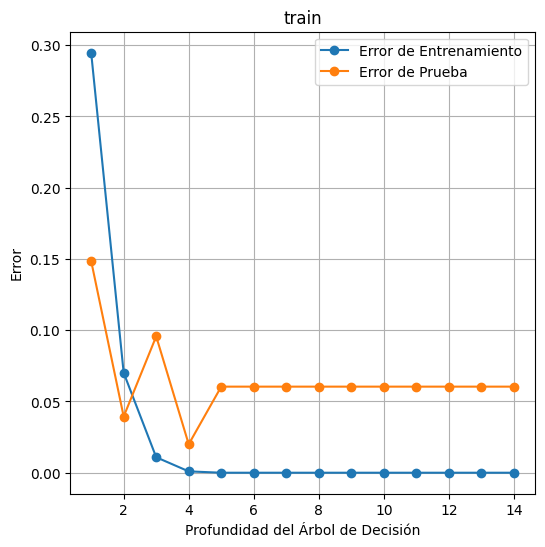

In [92]:
from sklearn.datasets import load_diabetes


# Rango de complejidades (profundidades del árbol de decisión)
complexities = range(1, 15)

# Listas para almacenar los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Calcular errores para diferentes complejidades del modelo
for max_depth in complexities:
    # Crear y ajustar el modelo de árbol de decisión con la profundidad especificada
    modelo = DecisionTreeRegressor(max_depth=max_depth, random_state=49150)
    modelo.fit(X_train, y_train)

    # Predicciones en el conjunto de entrenamiento y prueba
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Calcular los errores de entrenamiento y prueba
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Almacenar los errores
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar la evolución de los errores de entrenamiento, prueba
plt.figure(figsize=(6, 6))
plt.plot(complexities, train_errors, label='Error de Entrenamiento', marker='o', color='tab:blue')
plt.plot(complexities, test_errors, label='Error de Prueba', marker='o', color='tab:orange')
plt.xlabel('Profundidad del Árbol de Decisión')
plt.ylabel('Error')
plt.title('train')
plt.legend()
plt.grid(True)
plt.show()

# plt.plot(complexities, test_errors, label='Error de Entrenamiento (RMSE)', marker='o', color='tab:blue')
# plt.title('test')
# plt.grid(True)


## Analisis


Analizando los modelos presentados a partir de las métricas de rendimiento (MAE, MSE, RMSE y MAPE), podemos concluir que el XGBRegressor es el modelo que ofrece el mejor rendimiento. Aquí se presentan las razones detalladas

XGBRegressor tiene un MAE de 0.228329, el más bajo entre todos los modelos, lo que indica que las predicciones son las más cercanas a los valores reales.

el MSE de 0.090311, el más bajo entre todos los modelos, lo que indica que no solo tiene errores pequeños, sino que también minimiza los errores grandes.

XGBRegressor tiene un RMSE de 0.300517, el más bajo entre todos los modelos, lo que indica un menor error en las mismas unidades que los datos.

XGBRegressor tiene un MAPE de 0.246545, el más bajo entre todos los modelos, lo que indica que sus errores son pequeños en relación con los valores reales

Es importante considerar que lo datos fueron normalizados por lo que el entrnamiendo y las predicciones del data set estan normalizzados con la tecnica stand scaler